In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#Loading the dataset
e = pd.read_csv('earthquake.csv')

In [3]:
#Feature Engineering based on 'Depth'
#Categorizing depth into Shallow, Moderate, and Deep Earthquakes
depth_bins = [-np.inf, 50, 150, np.inf] #-np.inf denotes negative infinity and np.inf denotes positive infinity
depth_labels = ['Shallow', 'Moderate', 'Deep']
e['Depth_Category'] = pd.cut(e['Depth'], bins = depth_bins, labels = depth_labels) #pd.cut() is for sorting and segregating the data or 'depth' into bins and their respective labels 

In [4]:
#One-hot encoding of the depth category
e = pd.get_dummies(e, columns = ['Depth_Category'], drop_first = True)

In [5]:
#Extracting the features and target variables
features = ['Latitude', 'Longitude', 'Magnitude', 'Depth_Category_Moderate', 'Depth_Category_Deep']
X = e[features]
Y = e['Magnitude']

In [6]:
e

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location,City,Depth_Category_Moderate,Depth_Category_Deep
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India",India,False,False
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India",India,False,False
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India",India,False,False
3,2021-07-30 03:33:16 IST,27.90,94.20,10.0,3.0,"48km W of Basar, Arunachal Pradesh, India",India,False,False
4,2021-07-29 18:47:30 IST,26.60,92.51,28.0,3.1,"28km WSW of Tezpur, Assam, India",India,False,False
...,...,...,...,...,...,...,...,...,...
1605,2019-08-04 06:56:19 IST,12.30,94.80,10.0,4.8,"224km ESE of Diglipur, Andaman and Nicobar isl...",India,False,False
1606,2019-08-04 05:40:33 IST,24.70,94.30,40.0,4.1,"31km SW of Ukhrul, Manipur, India",India,False,False
1607,2019-08-03 16:29:37 IST,22.50,88.10,10.0,3.6,"28km WSW of Kolkata, India",India,False,False
1608,2019-08-03 01:59:11 IST,24.60,94.20,54.0,3.5,"35km SE of Imphal, Manipur, India",India,True,False


In [7]:
#splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 40)

In [8]:
#Standardizing the features
sc = StandardScaler()
X_train_scl = sc.fit_transform(X_train)
X_test_scl = sc.transform(X_test)

In [9]:
#Training a Random Forest Regression Model for the purpose of comparison
rfr = RandomForestRegressor(random_state = 40)
rfr.fit(X_train_scl, Y_train)

RandomForestRegressor(random_state=40)

In [10]:
#Making predictions on the testing set
Y_pred_rfr = rfr.predict(X_test_scl)

In [11]:
#Evaluating the model on the basis of mean-squared error
mse_rfr = mean_squared_error(Y_test, Y_pred_rfr)

In [12]:
print("Random Forest Mean Squared Error: ", mse_rfr)

Random Forest Mean Squared Error:  0.0019287111801241839


In [13]:
#Evaluating the model on the basis of R-squared
r2_rfr = r2_score(Y_test, Y_pred_rfr)

In [14]:
print("Random Forest R^2 Score: ", r2_rfr)

Random Forest R^2 Score:  0.9970770119574498


In [15]:
#Evaluating the model on the basis of mean absolute error
mae_rfr = mean_absolute_error(Y_test, Y_pred_rfr)

In [16]:
print("Random Forest Mean Absolute Error: ", mae_rfr)

Random Forest Mean Absolute Error:  0.0031397515527988367


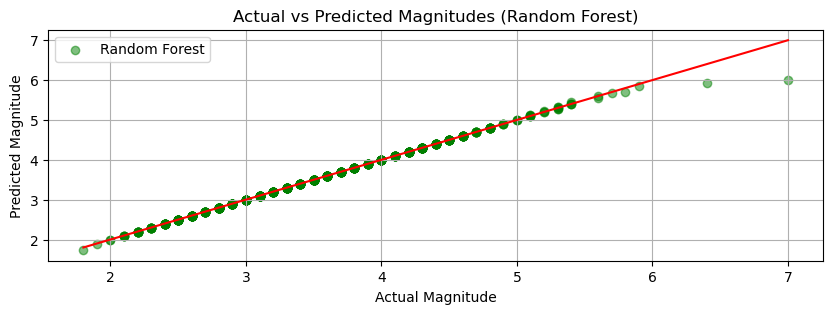

In [19]:
#plotting the actual vs the predicted result for Random Forest
plt.figure(figsize = (10, 3))
plt.scatter(Y_test, Y_pred_rfr, color = 'green', alpha = 0.5, label = 'Random Forest')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color = 'red')
plt.title('Actual vs Predicted Magnitudes (Random Forest)')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.legend()
plt.grid(True)
plt.show()